In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline

In [2]:
plt.style.use("seaborn")

In [ ]:
# df = pd.read_csv('2019_survey_results_public.csv', index_col='Respondent')
# schema_df = pd.read_csv("2019_survey_results_schema.csv", index_col='Column')

#### Filtered data set based on the following:

- only entries from `United States`

- removal of nan values from 'Gender', 'RaceEthnicity', 'YearsCoding', 'YearsCodingProf'

- featured columns are - 'Gender', 'Hobbyist', 'Ethnicity', 'YearsCode', 'YearsCodePro'

In [ ]:
# unitedstates_df = df[df['Country'] == 'United States']

In [ ]:
# filt = unitedstates_df[unitedstates_df['Ethnicity'].notnull() & unitedstates_df['Gender'].notnull() & unitedstates_df['YearsCode'].notnull() & unitedstates_df['YearsCodePro'].notnull()]

In [ ]:
# filt = filt[['Gender', 'Hobbyist', 'Ethnicity', 'YearsCode', 'YearsCodePro']]

In [ ]:
# filt.to_pickle("filtered_2019data.pkl")

In [3]:
data = pd.read_pickle("2019_filtered_data.pkl")

#### Initial steps

1) Need to change numbers in YearsCodePro to junior, mid level, etc.

2) Aggregate groups of data (all men, all white men, etc). I want counts here (normalized for percentage)

3) Create graph

In [4]:
# data_df['Gender'].unique()
list_gender_togroup = ['Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming']



In [5]:
# data_df['Ethnicity'].unique()
list_ethn_poc = ['Black or of African descent',
       'South Asian', 'East Asian',
       'Black or of African descent;White or of European descent;Biracial',
       'Hispanic or Latino/Latina;White or of European descent',
       'Black or of African descent;Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina',
       'East Asian;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Middle Eastern;White or of European descent', 'Middle Eastern',
       'Biracial', 'South Asian;White or of European descent;Multiracial',
       'East Asian;White or of European descent;Biracial', 'Multiracial',
       'Black or of African descent;White or of European descent',
       'East Asian;Hispanic or Latino/Latina;White or of European descent',
       'East Asian;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina;Multiracial',
       'South Asian;White or of European descent;Biracial',
       'Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Native American, Pacific Islander, or Indigenous Australian',
       'Black or of African descent;White or of European descent;Multiracial',
       'Black or of African descent;Hispanic or Latino/Latina;White or of European descent',
       'Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
       'Hispanic or Latino/Latina;Biracial',
       'East Asian;White or of European descent',
       'Hispanic or Latino/Latina;South Asian;Multiracial',
       'Hispanic or Latino/Latina;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina;White or of European descent;Biracial',
       'Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Biracial',
       'East Asian;South Asian',
       'Middle Eastern;White or of European descent;Multiracial',
       'Black or of African descent;South Asian;Multiracial',
       'South Asian;Multiracial',
       'South Asian;White or of European descent',
       'Black or of African descent;East Asian',
       'Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial',
       'East Asian;Biracial;Multiracial',
       'Black or of African descent;Hispanic or Latino/Latina',
       'Black or of African descent;South Asian;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Multiracial',
       'Black or of African descent;East Asian;White or of European descent;Multiracial',
       'East Asian;South Asian;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina;White or of European descent;Biracial;Multiracial',
       'White or of European descent;Multiracial',
       'East Asian;White or of European descent;Biracial;Multiracial',
       'Black or of African descent;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'East Asian;Middle Eastern',
       'Black or of African descent;Native American, Pacific Islander, or Indigenous Australian',
       'East Asian;Native American, Pacific Islander, or Indigenous Australian',
       'White or of European descent;Biracial',
       'Middle Eastern;South Asian;Multiracial',
       'Black or of African descent;Middle Eastern;White or of European descent',
       'Native American, Pacific Islander, or Indigenous Australian;South Asian',
       'Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian',
       'Hispanic or Latino/Latina;Middle Eastern',
       'Black or of African descent;Hispanic or Latino/Latina;Middle Eastern;Multiracial',
       'Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial',
       'Black or of African descent;Biracial',
       'Black or of African descent;Hispanic or Latino/Latina;Multiracial',
       'Black or of African descent;Multiracial',
       'Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
       'Black or of African descent;Hispanic or Latino/Latina;South Asian;White or of European descent;Biracial',
       'Middle Eastern;White or of European descent;Biracial',
       'Middle Eastern;Multiracial', 'Biracial;Multiracial',
       'Middle Eastern;South Asian',
       'Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Black or of African descent;White or of European descent;Biracial;Multiracial',
       'East Asian;Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
       'East Asian;Hispanic or Latino/Latina;White or of European descent;Multiracial',
       'South Asian;White or of European descent;Biracial;Multiracial',
       'Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
       'Black or of African descent;East Asian;Biracial',
       'East Asian;Hispanic or Latino/Latina;Biracial',
       'Black or of African descent;Hispanic or Latino/Latina;Middle Eastern;Biracial',
       'Black or of African descent;Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;White or of European descent',
       'East Asian;Biracial',
       'Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Biracial;Multiracial',
       'White or of European descent;Biracial;Multiracial',
       'Hispanic or Latino/Latina;Middle Eastern;White or of European descent;Multiracial',
       'Black or of African descent;Middle Eastern;Biracial;Multiracial',
       'East Asian;Native American, Pacific Islander, or Indigenous Australian;Multiracial',
       'East Asian;South Asian;White or of European descent;Biracial;Multiracial',
       'Hispanic or Latino/Latina;Middle Eastern;White or of European descent',
       'Hispanic or Latino/Latina;South Asian;White or of European descent;Multiracial',
       'Black or of African descent;Hispanic or Latino/Latina;Biracial',
       'Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial;Multiracial',
       'East Asian;Multiracial',
       'Black or of African descent;Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;Multiracial',
       'East Asian;Native American, Pacific Islander, or Indigenous Australian;Biracial;Multiracial',
       'Native American, Pacific Islander, or Indigenous Australian;Multiracial',
       'Middle Eastern;Biracial',
       'East Asian;South Asian;White or of European descent',
       'South Asian;Biracial;Multiracial',
       'East Asian;Hispanic or Latino/Latina;Multiracial',
       'East Asian;South Asian;Biracial',
       'Hispanic or Latino/Latina;Biracial;Multiracial',
       'Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Multiracial',
       'Black or of African descent;Biracial;Multiracial',
       'East Asian;Hispanic or Latino/Latina',
       'Middle Eastern;White or of European descent;Biracial;Multiracial',
       'East Asian;Middle Eastern;South Asian;White or of European descent;Multiracial',
       'Black or of African descent;Hispanic or Latino/Latina;Biracial;Multiracial',
       'Black or of African descent;East Asian;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Hispanic or Latino/Latina;Middle Eastern;Multiracial',
       'Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Biracial;Multiracial',
       'Black or of African descent;South Asian;Biracial',
       'East Asian;Hispanic or Latino/Latina;Native American, Pacific Islander, or Indigenous Australian;South Asian',
       'Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;White or of European descent;Multiracial',
       'Black or of African descent;South Asian']

In [6]:
# there are a few strings in the values under YearsCodePro. Want to change this to an int
data_df = data.replace({'YearsCodePro': 'Less than 1 year'}, 1)
data_df = data_df.replace({'YearsCodePro':'More than 50 years'}, 51)
data_df = data_df.replace(to_replace="Man", value='Cis Men')
data_df = data_df.replace(to_replace=list_gender_togroup, value='Marginalized Genders')
data_df = data_df.replace(to_replace=list_ethn_poc, value='POC')
data_df

,Gender,Hobbyist,Ethnicity,YearsCode,YearsCodePro
Respondent,,,,,
4,Cis Men,No,White or of European descent,3,1
13,Cis Men,Yes,White or of European descent,17,8
22,Cis Men,Yes,White or of European descent,35,18
23,Cis Men,Yes,POC,3,1
29,Cis Men,Yes,White or of European descent,4,2
...,...,...,...,...,...
72325,Cis Men,Yes,White or of European descent,9,3
78292,Cis Men,No,White or of European descent,42,31
82717,Cis Men,No,White or of European descent,Less than 1 year,1


In [7]:
data_df['YearsCodePro'] = data_df['YearsCodePro'].astype(int)

In [8]:
# changing number values of YearsCodePro to labels
cut_bins = [0, 3, 6, 15, 52]

In [9]:
pro_levels = pd.cut(data_df['YearsCodePro'], cut_bins, labels = ['Juniors', 'Mid-Level', 'Experienced', 'Very Experienced'])

In [10]:
data_df['YearsCodePro'] = pro_levels
data_df

,Gender,Hobbyist,Ethnicity,YearsCode,YearsCodePro
Respondent,,,,,
4,Cis Men,No,White or of European descent,3,Juniors
13,Cis Men,Yes,White or of European descent,17,Experienced
22,Cis Men,Yes,White or of European descent,35,Very Experienced
23,Cis Men,Yes,POC,3,Juniors
29,Cis Men,Yes,White or of European descent,4,Juniors
...,...,...,...,...,...
72325,Cis Men,Yes,White or of European descent,9,Juniors
78292,Cis Men,No,White or of European descent,42,Very Experienced
82717,Cis Men,No,White or of European descent,Less than 1 year,Juniors


#### Info

1) Get group of certain experience level - e.g. juniors

2) Groupby gender and get group of one of the listed genders

3) Groupby ethnicity and get group

In [11]:
yearscodepro = data_df.groupby('YearsCodePro')

#### Create empty lists for each ethnicity and gender filter

In [12]:
white_cis_men_list = []
white_marginalized_genders_list = []
poc_cis_men_list = []
poc_marginalized_genders_list = []

##### for each experience level, group by ethnicity and gender --> store in the appropriate list

In [13]:
list_experience_levels = ['Juniors', 'Mid-Level', 'Experienced', 'Very Experienced']

for i in list_experience_levels:
    # group by each level and filter by gender/ethnicity
    x = yearscodepro.get_group(i)
    length_x = len(x)
    
    # white cis men
    x_gender = x.groupby('Gender')
    x_man = x_gender.get_group('Cis Men')
    x_ethnicity = x_man.groupby('Ethnicity')
    x_white_cismen = x_ethnicity.get_group('White or of European descent')
    length_x_white_cismen = len(x_white_cismen['Gender'])
    percentage_x_white_cismen = length_x_white_cismen / length_x * 100
    white_cis_men_list.append(percentage_x_white_cismen)
    
    # white marginalized genders
    x_marginalized_gender = x_gender.get_group('Marginalized Genders')
    x_ethn_marginzalized_genders = x_marginalized_gender.groupby('Ethnicity')
    x_white_marginzalized_genders = x_ethn_marginzalized_genders.get_group('White or of European descent')
    length_x_white_marg_genders = len(x_white_marginzalized_genders['Gender'])
    percentage_x_white_marg_genders = length_x_white_marg_genders / length_x * 100
    white_marginalized_genders_list.append(percentage_x_white_marg_genders)
    
    # POC cis men
    x_poc_cismen = x_ethnicity.get_group('POC')
    length_x_poc_cismen = len(x_poc_cismen['Gender'])
    percentage_x_poc_cismen = length_x_poc_cismen / length_x * 100
    poc_cis_men_list.append(percentage_x_poc_cismen)

    # POC marginalized genders
    x_poc_marg_genders = x_ethn_marginzalized_genders.get_group('POC')
    length_x_poc_marg_genders = len(x_poc_marg_genders['Gender'])
    percentage_x_poc_marg_genders = length_x_poc_marg_genders / length_x * 100
    poc_marginalized_genders_list.append(percentage_x_poc_marg_genders)

### Stacked Bar Graph

In [14]:
yearsprolevel = data_df['YearsCodePro'].unique()

In [15]:
# creating bar variables for the `bottom` argument in our plt.bar code
bars1 = np.add(white_cis_men_list, white_marginalized_genders_list).tolist()
bars2 = np.add(bars1, poc_cis_men_list).tolist()

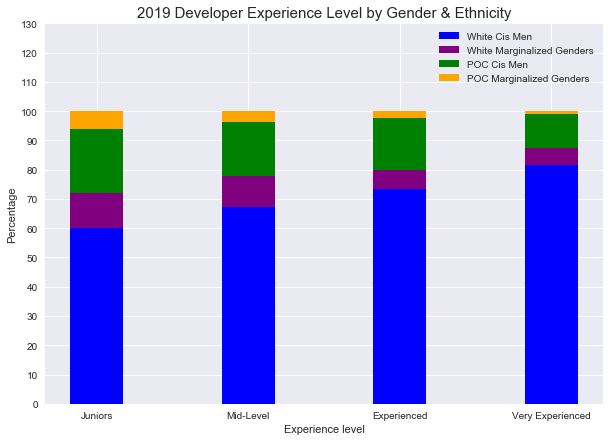

In [16]:
fig = plt.figure(figsize = (10, 7)) 

ind = np.arange(len(yearsprolevel))

bar_white_cis_man = plt.bar(ind, white_cis_men_list, width=0.35, color="blue", label='White Cis Men')
bar_white_mar_gen = plt.bar(ind, white_marginalized_genders_list, width=0.35, color="purple", bottom=white_cis_men_list, label='White Marginalized Genders')
bar_poc_cis_man = plt.bar(ind, poc_cis_men_list, width=0.35, color="green", bottom=bars1, label='POC Cis Men')
bar_poc_mar_gen = plt.bar(ind, poc_marginalized_genders_list, width=0.35, color="orange", bottom=bars2, label='POC Marginalized Genders')


plt.xticks(ind, ('Juniors', 'Mid-Level', 'Experienced', 'Very Experienced')) 

plt.yticks(np.arange(0, 140, 10))

plt.legend()
plt.xlabel('Experience level')
plt.ylabel('Percentage')
plt.title('2019 Developer Experience Level by Gender & Ethnicity', fontsize=15)

plt.show()
# fig.savefig('2019_DEI_exp_gender.jpg')

## Prior code (irrelevant)

### Refactor code strategy (Actual)
Grouped based on gender/ethnicity and saved the values for each level in a list. E.g. white cis men values across Junior, midlevel, etc were saved in a list together

created a for loop based on experience levels


### (Original thoughts)
- I can save all the junior, midlevel etc experience variables into a list.

- once a list is created (list of values), for each value in the list, I can create a bar plt (likely will be looping through)

- for each bar, I will want to compare the previous variable name to see if it has the same beginning (so len[:4]) - if so stack the bar, if not start bar on new xtick

In [ ]:
# # white man

# juniors = yearscodepro.get_group('Juniors')
# length_juniors = len(juniors)
# jun_gen = juniors.groupby('Gender')
# jun_man = jun_gen.get_group('Man')
# jun_Ethn = jun_man.groupby('Ethnicity')
# jun_whiteguy = jun_Ethn.get_group('White or of European descent')
# length_jun_whiteguy = len(jun_whiteguy['Gender'])
# per_junwhiteman = length_jun_whiteguy / length_juniors * 100
# # print('white man ' + str(per_junwhiteman))
# white_man_list.append(per_junwhiteman)

# # white non man
# jun_nonman = jun_gen.get_group('Non-man')
# jun_Ethn_nonman = jun_nonman.groupby('Ethnicity')
# jun_white_nonman = jun_Ethn_nonman.get_group('White or of European descent')
# length_junwhite_nonman = len(jun_white_nonman['Gender'])
# per_junwhite_nonman = length_junwhite_nonman / length_juniors * 100
# # print('white non man ' + str(per_junwhite_nonman))
# white_mar_genders_list.append(per_junwhite_nonman)

# # POC man
# jun_pocguy = jun_Ethn.get_group('POC')
# length_jun_pocguy = len(jun_pocguy['Gender'])
# per_junpoc_man = length_jun_pocguy / length_juniors * 100
# # print('POC man ' + str(per_junpoc_man))
# poc_man_list.append(per_junpoc_man)


# # POC non man
# jun_poc_nonman = jun_Ethn_nonman.get_group('POC')
# length_junpoc_nonman = len(jun_poc_nonman['Gender'])
# per_junpoc_nonman = length_junpoc_nonman / length_juniors * 100
# # print('POC non man ' + str(per_junpoc_nonman))
# poc_mar_genders_list.append(per_junpoc_nonman)

#### Mid-Level

In [ ]:
# midlevel = yearscodepro.get_group('Mid-Level')
# length_mid = len(midlevel)

# midlvl_gender = midlevel.groupby('Gender')
# midlvl_man = midlvl_gender.get_group('Man')
# midlvl_Ethn = midlvl_man.groupby('Ethnicity')
# midlvl_whiteguy = midlvl_Ethn.get_group('White or of European descent')


# length_mid_whiteguy = len(midlvl_whiteguy['Gender'])
# per_mid_whiteman = length_mid_whiteguy / length_mid * 100
# print('white man ' + str(per_mid_whiteman))

# white_man_list.append(per_mid_whiteman)


# # white non man
# midlvl_nonman = midlvl_gender.get_group('Non-man')
# midlvl_Ethn_nonman = midlvl_nonman.groupby('Ethnicity')
# midlvl_white_nonman = midlvl_Ethn_nonman.get_group('White or of European descent')
# length_midlvl_white_nonman = len(midlvl_white_nonman['Gender'])
# per_midlvl_white_nonman = length_midlvl_white_nonman / length_mid * 100
# print('white non man ' + str(per_midlvl_white_nonman))

# white_mar_genders_list.append(per_midlvl_white_nonman)


# # POC man
# midlvl_pocguy = midlvl_Ethn.get_group('POC')
# length_midlvl_pocguy = len(midlvl_pocguy['Gender'])
# per_midlvlpoc_man = length_midlvl_pocguy / length_mid * 100
# print('POC man ' + str(per_midlvlpoc_man))

# poc_man_list.append(per_midlvlpoc_man)


# # POC non man
# midlvl_poc_nonman = midlvl_Ethn_nonman.get_group('POC')
# length_midlvlpoc_nonman = len(midlvl_poc_nonman['Gender'])
# per_midlvlpoc_nonman = length_midlvlpoc_nonman / length_mid * 100
# print('POC non man ' + str(per_midlvlpoc_nonman))

# poc_mar_genders_list.append(per_midlvlpoc_nonman)

#### Experienced

In [ ]:
# # white man
# experienced = yearscodepro.get_group('Experienced')
# experienced_gender = experienced.groupby('Gender')
# experienced_man = experienced_gender.get_group('Man')
# experienced_Ethn = experienced_man.groupby('Ethnicity')
# experienced_whiteguy = experienced_Ethn.get_group('White or of European descent')

# length_experienced = len(experienced)
# length_experienced_whiteguy = len(experienced_whiteguy['Gender'])
# per_experienced_whiteman = length_experienced_whiteguy / length_experienced * 100
# print('white man ' + str(per_experienced_whiteman))

# white_man_list.append(per_experienced_whiteman)


# # white non man
# experienced_nonman = experienced_gender.get_group('Non-man')
# experienced_Ethn_nonman = experienced_nonman.groupby('Ethnicity')
# experienced_white_nonman = experienced_Ethn_nonman.get_group('White or of European descent')
# length_experienced_white_nonman = len(experienced_white_nonman['Gender'])
# per_experienced_white_nonman = length_experienced_white_nonman / length_experienced * 100
# print('white non man ' + str(per_experienced_white_nonman))

# white_mar_genders_list.append(per_experienced_white_nonman)

# # POC man
# experienced_pocguy = experienced_Ethn.get_group('POC')
# length_experienced_pocguy = len(experienced_pocguy['Gender'])
# per_experienced_poc_man = length_experienced_pocguy / length_experienced * 100
# print('POC man ' + str(per_experienced_poc_man))

# poc_man_list.append(per_experienced_poc_man)

# # POC non man
# experienced_poc_nonman = experienced_Ethn_nonman.get_group('POC')
# length_experienced_poc_nonman = len(experienced_poc_nonman['Gender'])
# per_experienced_poc_nonman = length_experienced_poc_nonman / length_experienced * 100
# print('POC non man ' + str(per_experienced_poc_nonman))

# poc_mar_genders_list.append(per_experienced_poc_nonman)

#### Very experienced

In [ ]:
# very_exp = yearscodepro.get_group('Very Experienced')
# very_exp_gender = very_exp.groupby('Gender')
# very_exp_man = very_exp_gender.get_group('Man')
# very_exp_Ethn = very_exp_man.groupby('Ethnicity')
# very_exp_whiteguy = very_exp_Ethn.get_group('White or of European descent')


# length_very_exp = len(very_exp)
# length_very_exp_whiteguy = len(very_exp_whiteguy['Gender'])
# per_very_exp_whiteman = length_very_exp_whiteguy / length_very_exp * 100
# print('white man ' +  str(per_very_exp_whiteman))

# white_man_list.append(per_very_exp_whiteman)

# # white non man
# very_exp_nonman = very_exp_gender.get_group('Non-man')
# very_exp_Ethn_nonman = very_exp_nonman.groupby('Ethnicity')
# very_exp_white_nonman = very_exp_Ethn_nonman.get_group('White or of European descent')
# length_very_exp_white_nonman = len(very_exp_white_nonman['Gender'])
# per_very_exp_white_nonman = length_very_exp_white_nonman / length_very_exp * 100
# print('white non man ' + str(per_very_exp_white_nonman))

# white_mar_genders_list.append(per_very_exp_white_nonman)

# # POC man
# very_exp_pocguy = very_exp_Ethn.get_group('POC')
# length_very_exp_pocguy = len(very_exp_pocguy['Gender'])
# per_very_exp_poc_man = length_very_exp_pocguy / length_very_exp * 100
# print('POC man ' + str(per_very_exp_poc_man))

# poc_man_list.append(per_very_exp_poc_man)

# # POC non man
# very_exp_poc_nonman = very_exp_Ethn_nonman.get_group('POC')
# length_very_exp_poc_nonman = len(very_exp_poc_nonman['Gender'])
# per_very_exp_poc_nonman = length_very_exp_poc_nonman / length_very_exp * 100
# print('POC non man ' + str(per_very_exp_poc_nonman))

# poc_mar_genders_list.append(per_very_exp_poc_nonman)

In [ ]:
# #Label update: cis men and marginalized genders

# fig, ax = plt.subplots(figsize=(10,7))
# # plt.figure(figsize=(10,7))

# graphJuniorw = plt.bar(x=0, height=per_junwhiteman, width=0.35, color="blue", label='White Cis Man')
# graphJuniorw_nonman = plt.bar(x=0, height=per_junwhite_nonman, width=0.35, color="purple", bottom=per_junwhiteman, label='White Marginalized Genders')
# graphJuniorpoc = plt.bar(x=0, height=per_junpoc_man, width=0.35, color="green", bottom=per_junwhite_nonman+per_junwhiteman, label='POC Cis Man')
# graphJuniorpoc_nonman = plt.bar(x=0, height=per_junpoc_nonman, width=0.35,  color="orange", bottom=per_junpoc_man+per_junwhite_nonman+per_junwhiteman, label='POC Marginalized Genders')


# graphMidlevelw = plt.bar(x=1, height=per_mid_whiteman, width=0.35, color="blue")
# graphMidlevelw_nonman = plt.bar(x=1, height=per_midlvl_white_nonman, width=0.35, color="purple", bottom=per_mid_whiteman)
# graphMidlevelpoc = plt.bar(x=1, height=per_midlvlpoc_man, width=0.35, color="green", bottom=per_midlvl_white_nonman+per_mid_whiteman)
# graphMidlevelpoc_nonman = plt.bar(x=1, height=per_midlvlpoc_nonman, width=0.35, color="orange", bottom=per_midlvlpoc_man+per_midlvl_white_nonman+per_mid_whiteman)


# graphExpw = plt.bar(x=2, height=per_experienced_whiteman, width=0.35, color="blue")
# graphExppoc = plt.bar(x=2, height=per_experienced_white_nonman, width=0.35, color="purple", bottom=per_experienced_whiteman)
# graphExppoc = plt.bar(x=2, height=per_experienced_poc_man, width=0.35, color="green", bottom=per_experienced_white_nonman+per_experienced_whiteman)
# graphExppoc = plt.bar(x=2, height=per_experienced_poc_nonman, width=0.35, color="orange", bottom=per_experienced_poc_man+per_experienced_white_nonman+per_experienced_whiteman)


# graphVeryw = plt.bar(x=3, height=per_very_exp_whiteman, width=0.35, color="blue")
# graphVerypoc = plt.bar(x=3, height=per_very_exp_white_nonman, width=0.35, color="purple", bottom=per_very_exp_whiteman)
# graphVerypoc = plt.bar(x=3, height=per_very_exp_poc_man, width=0.35, color="green", bottom=per_very_exp_white_nonman+per_very_exp_whiteman)
# graphVerypoc = plt.bar(x=3, height=per_very_exp_poc_nonman, width=0.35, color="orange", bottom=per_very_exp_poc_man+per_very_exp_white_nonman+per_very_exp_whiteman)

# indx = np.arange(len(yearsprolevel))
# # plt.xticks(np.arange(1, 5, 0.5))

# ax.set_xticks(indx)
# ax.set_xticklabels(labels=['Juniors', 'Mid-Level', 'Experienced', 'Very Experienced'])

# plt.yticks(np.arange(0, 140, 10))

# ax.legend(loc='upper left',bbox_to_anchor=(0.7, 1))
# plt.xlabel('Job levels')
# plt.title('2019 Developer Experience Level by Gender & Ethnicity', fontsize=15)

# # fig.savefig('2019_DEI_exp_gender.jpg')